<a href="https://colab.research.google.com/github/sharmahimanshi81/EMAIL-SPAM-DETECTION/blob/main/emailSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score



df = pd.read_csv("/content/spam.csv", encoding='latin-1')[['Category', 'Message']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# 🔤 Vectorize text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

In [ ]:
# 🤖 Build neural network
model = Sequential()
model.add(Dense(64, input_shape=(X_train_vec.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ⚙️ Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#train
history = model.fit(X_train_vec, y_train, epochs=5, batch_size=32, validation_data=(X_test_vec, y_test))

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8976 - loss: 0.4014 - val_accuracy: 0.9883 - val_loss: 0.0615
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9920 - loss: 0.0325 - val_accuracy: 0.9883 - val_loss: 0.0520
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9993 - loss: 0.0053 - val_accuracy: 0.9883 - val_loss: 0.0570
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9901 - val_loss: 0.0621
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9901 - val_loss: 0.0626


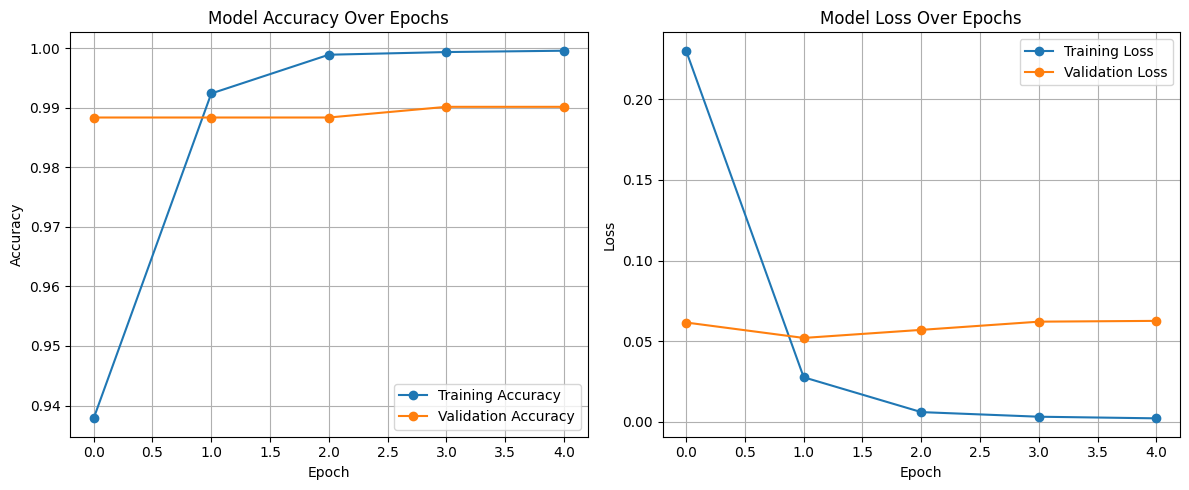

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# 🧪 Predict on test data
y_pred_prob = model.predict(X_test_vec)
y_pred = (y_pred_prob >= 0.5).astype(int)

# 📊 Accuracy score
from sklearn.metrics import accuracy_score
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Test Accuracy: {final_accuracy * 100:.2f}%")


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

✅ Final Test Accuracy: 99.01%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))



📊 Confusion Matrix:
[[965   1]
 [ 10 139]]

🧾 Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

